In [2]:
import numpy as np

from PIL import Image
image = Image.open('5x5.png')
image.show()

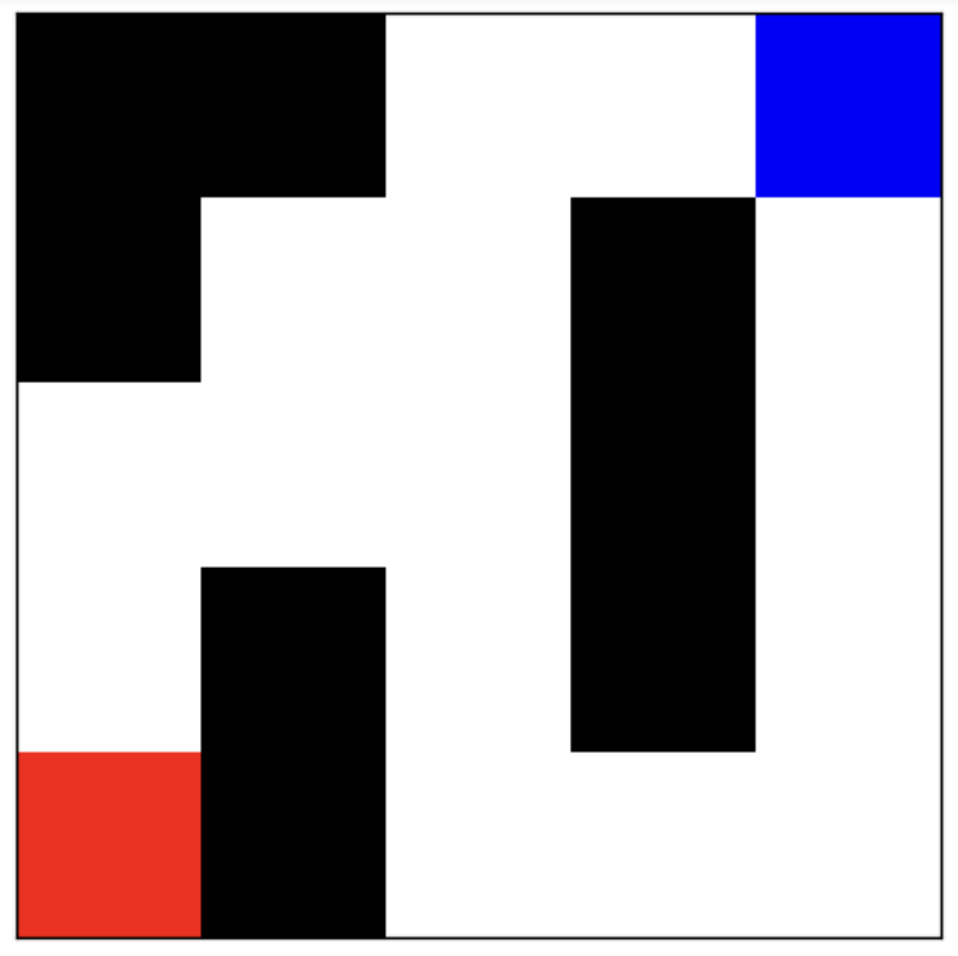

In [2]:
image

In [15]:
maze = ([0,0,1,1,2],
        [0,1,1,0,1],
        [1,1,1,0,1],
        [0,1,0,1,0],
        [2,0,1,1,1])



In [25]:
start = maze[0][4]
end = maze[4][0]
agent = 100

(4, 4)

In [61]:
naive_solution()


NameError: name 'wall' is not defined

{(0, 0, 0): 0, (0, 0, 1): 0, (0, 0, 2): 0, (0, 0, 3): 0, (0, 1, 0): 0, (0, 1, 1): 0, (0, 1, 2): 0, (0, 1, 3): 0, (0, 2, 0): 0, (0, 2, 1): 0, (0, 2, 2): 0, (0, 2, 3): 0, (0, 3, 0): 0, (0, 3, 1): 0, (0, 3, 2): 0, (0, 3, 3): 0, (0, 4, 0): 0, (0, 4, 1): 0, (0, 4, 2): 0, (0, 4, 3): 0, (1, 0, 0): 0, (1, 0, 1): 0, (1, 0, 2): 0, (1, 0, 3): 0, (1, 1, 0): 0, (1, 1, 1): 0, (1, 1, 2): 0, (1, 1, 3): 0, (1, 2, 0): 0, (1, 2, 1): 0, (1, 2, 2): 0, (1, 2, 3): 0, (1, 3, 0): 0, (1, 3, 1): 0, (1, 3, 2): 0, (1, 3, 3): 0, (1, 4, 0): 0, (1, 4, 1): 0, (1, 4, 2): 0, (1, 4, 3): 0, (2, 0, 0): 0, (2, 0, 1): 0, (2, 0, 2): 0, (2, 0, 3): 0, (2, 1, 0): 0, (2, 1, 1): 0, (2, 1, 2): 0, (2, 1, 3): 0, (2, 2, 0): 0, (2, 2, 1): 0, (2, 2, 2): 0, (2, 2, 3): 0, (2, 3, 0): 0, (2, 3, 1): 0, (2, 3, 2): 0, (2, 3, 3): 0, (2, 4, 0): 0, (2, 4, 1): 0, (2, 4, 2): 0, (2, 4, 3): 0, (3, 0, 0): 0, (3, 0, 1): 0, (3, 0, 2): 0, (3, 0, 3): 0, (3, 1, 0): 0, (3, 1, 1): 0, (3, 1, 2): 0, (3, 1, 3): 0, (3, 2, 0): 0, (3, 2, 1): 0, (3, 2, 2): 0, (3, 2

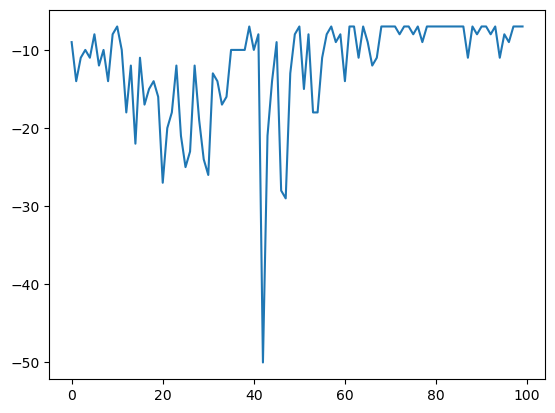

-----------------------------------------------
| 0      | -5     | -4.153 | -4.737 | -5.263 | 
-----------------------------------------------
| -5     | -2.783 | -3.504 | -5     | -4.968 | 
-----------------------------------------------
| -1.091 | -1.982 | -2.783 | -5     | -4.774 | 
-----------------------------------------------
| -0.1   | -5     | -3.336 | -5     | -4.312 | 
-----------------------------------------------
| 1      | -5     | -3.569 | -3.724 | -4.013 | 
-----------------------------------------------


In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt



#set the rows and columns length
BOARD_ROWS = 5
BOARD_COLS = 5

#initalise start, win and lose states
START = (0, 4)
WIN_STATE = (4,0 )
HOLE_STATE = [(0,0),(0,1),(1,0),(1,3),(2,3),(3,1),(3,3),(4,1)]

#class state defines the board and decides reward, end and next position
class State:
    def __init__(self, state=START):
        #initalise the state to start and end to false
        self.state = state
        self.isEnd = False        

    def getReward(self):
        #give the rewards for each state -5 for loss, +1 for win, -1 for others
        for i in HOLE_STATE:
            if self.state == i:
                return -5
        if self.state == WIN_STATE:
            return 1       
        
        else:
            return -1

    def isEndFunc(self):
        #set state to end if win/loss
        if (self.state == WIN_STATE):
            self.isEnd = True
            
        for i in HOLE_STATE:
            if self.state == i:
                self.isEnd = True

    def nxtPosition(self, action):     
        #set the positions from current action - up, down, left, right
        if action == 0:                
            nxtState = (self.state[0] - 1, self.state[1]) #up             
        elif action == 1:
            nxtState = (self.state[0] + 1, self.state[1]) #down
        elif action == 2:
            nxtState = (self.state[0], self.state[1] - 1) #left
        else:
            nxtState = (self.state[0], self.state[1] + 1) #right


        #check if next state is possible
        if (nxtState[0] >= 0) and (nxtState[0] <= 4):
            if (nxtState[1] >= 0) and (nxtState[1] <= 4):    
                    #if possible change to next state                
                    return nxtState 
        #Return current state if outside grid     
        return self.state 



        
#class agent to implement reinforcement learning through grid  
class Agent:

    def __init__(self):
        #inialise states and actions 
        self.states = []
        self.actions = [0,1,2,3]    # up, down, left, right
        self.State = State()
        #set the learning and greedy values
        self.alpha = 0.5
        self.gamma = 0.9
        self.epsilon = 0.1
        self.isEnd = self.State.isEnd

        # array to retain reward values for plot
        self.plot_reward = []
        
        #initalise Q values as a dictionary for current and new
        self.Q = {}
        self.new_Q = {}
        #initalise rewards to 0
        self.rewards = 0
        
        #initalise all Q values across the board to 0, print these values
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                for k in range(len(self.actions)):
                    self.Q[(i, j, k)] =0
                    self.new_Q[(i, j, k)] = 0
        
        print(self.Q)
        
    

    #method to choose action with Epsilon greedy policy, and move to next state
    def Action(self):
        #random value vs epsilon
        rnd = random.random()
        #set arbitraty low value to compare with Q values to find max
        mx_nxt_reward =-10
        action = None
        
        #9/10 find max Q value over actions 
        if(rnd >self.epsilon) :
            #iterate through actions, find Q  value and choose best 
            for k in self.actions:
                
                i,j = self.State.state
                
                nxt_reward = self.Q[(i,j, k)]
                
                if nxt_reward >= mx_nxt_reward:
                    action = k
                    mx_nxt_reward = nxt_reward
                    
        #else choose random action
        else:
            action = np.random.choice(self.actions)
        
        #select the next state based on action chosen
        position = self.State.nxtPosition(action)
        return position,action
    
    
    #Q-learning Algorithm
    def Q_Learning(self,episodes):
        x = 0
        #iterate through best path for each episode
        while(x < episodes):
            #check if state is end
            if self.isEnd:
                #get current rewrard and add to array for plot
                reward = self.State.getReward()
                self.rewards += reward
                self.plot_reward.append(self.rewards)
                
                #get state, assign reward to each Q_value in state
                i,j = self.State.state
                for a in self.actions:
                    self.new_Q[(i,j,a)] = round(reward,3)
                    
                #reset state
                self.State = State()
                self.isEnd = self.State.isEnd
                
                #set rewards to zero and iterate to next episode
                self.rewards = 0
                x+=1
            else:
                #set to arbitrary low value to compare net state actions
                mx_nxt_value = -10
                #get current state, next state, action and current reward
                next_state, action = self.Action()
                i,j = self.State.state
                reward = self.State.getReward()
                #add reward to rewards for plot
                self.rewards +=reward
                
                #iterate through actions to find max Q value for action based on next state action
                for a in self.actions:
                    nxtStateAction = (next_state[0], next_state[1], a)
                    q_value = (1-self.alpha)*self.Q[(i,j,action)] + self.alpha*(reward + self.gamma*self.Q[nxtStateAction])
                
                    #find largest Q value
                    if q_value >= mx_nxt_value:
                        mx_nxt_value = q_value
                
                #next state is now current state, check if end state
                self.State = State(state=next_state)
                self.State.isEndFunc()
                self.isEnd = self.State.isEnd
                
                #update Q values with max Q value for next state
                self.new_Q[(i,j,action)] = round(mx_nxt_value,3)
            
            #copy new Q values to Q table
            self.Q = self.new_Q.copy()
        #print final Q table output
        print(self.Q)
        
    #plot the reward vs episodes
    def plot(self,episodes):
        
        plt.plot(self.plot_reward)
        plt.show()
        
        
    #iterate through the board and find largest Q value in each, print output
    def showValues(self):
        for i in range(0, BOARD_ROWS):
            print('-----------------------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                mx_nxt_value = -10
                for a in self.actions:
                    nxt_value = self.Q[(i,j,a)]
                    if nxt_value >= mx_nxt_value:
                        mx_nxt_value = nxt_value
                out += str(mx_nxt_value).ljust(6) + ' | '
            print(out)
        print('-----------------------------------------------')
        
    
        
if __name__ == "__main__":
    #create agent for 10,000 episdoes implementing a Q-learning algorithm plot and show values.
    ag = Agent()
    episodes = 100
    ag.Q_Learning(episodes)
    ag.plot(episodes)
    ag.showValues()

In [9]:
ag.Q_Learning(episodes)

{(0, 0, 0): -5, (0, 0, 1): -5, (0, 0, 2): -5, (0, 0, 3): -5, (0, 1, 0): -2.626, (0, 1, 1): -2.944, (0, 1, 2): -3.0, (0, 1, 3): -2.75, (0, 2, 0): -5, (0, 2, 1): -5, (0, 2, 2): -5, (0, 2, 3): -5, (0, 3, 0): -5.949, (0, 3, 1): -5.499, (0, 3, 2): -5.499, (0, 3, 3): -6.354, (0, 4, 0): -6.354, (0, 4, 1): -5.949, (0, 4, 2): -5.949, (0, 4, 3): -6.354, (1, 0, 0): -5, (1, 0, 1): -5, (1, 0, 2): -5, (1, 0, 3): -5, (1, 1, 0): -2.772, (1, 1, 1): -2.938, (1, 1, 2): -3.0, (1, 1, 3): -2.958, (1, 2, 0): -2.75, (1, 2, 1): -3.2, (1, 2, 2): -2.975, (1, 2, 3): -4.125, (1, 3, 0): -5, (1, 3, 1): -5, (1, 3, 2): -5, (1, 3, 3): -5, (1, 4, 0): -6.354, (1, 4, 1): -5.878, (1, 4, 2): -5.499, (1, 4, 3): -5.949, (2, 0, 0): -2.75, (2, 0, 1): -2.974, (2, 0, 2): -2.649, (2, 0, 3): -2.8, (2, 1, 0): -2.856, (2, 1, 1): -2.75, (2, 1, 2): -2.937, (2, 1, 3): -3.365, (2, 2, 0): -3.33, (2, 2, 1): -3.422, (2, 2, 2): -3.217, (2, 2, 3): -4.125, (2, 3, 0): -5, (2, 3, 1): -5, (2, 3, 2): -5, (2, 3, 3): -5, (2, 4, 0): -5.635, (2, 4, 1)

{(0, 0, 0): 0, (0, 0, 1): 0, (0, 0, 2): 0, (0, 0, 3): 0, (0, 1, 0): 0, (0, 1, 1): 0, (0, 1, 2): 0, (0, 1, 3): 0, (0, 2, 0): 0, (0, 2, 1): 0, (0, 2, 2): 0, (0, 2, 3): 0, (0, 3, 0): 0, (0, 3, 1): 0, (0, 3, 2): 0, (0, 3, 3): 0, (0, 4, 0): 0, (0, 4, 1): 0, (0, 4, 2): 0, (0, 4, 3): 0, (1, 0, 0): 0, (1, 0, 1): 0, (1, 0, 2): 0, (1, 0, 3): 0, (1, 1, 0): 0, (1, 1, 1): 0, (1, 1, 2): 0, (1, 1, 3): 0, (1, 2, 0): 0, (1, 2, 1): 0, (1, 2, 2): 0, (1, 2, 3): 0, (1, 3, 0): 0, (1, 3, 1): 0, (1, 3, 2): 0, (1, 3, 3): 0, (1, 4, 0): 0, (1, 4, 1): 0, (1, 4, 2): 0, (1, 4, 3): 0, (2, 0, 0): 0, (2, 0, 1): 0, (2, 0, 2): 0, (2, 0, 3): 0, (2, 1, 0): 0, (2, 1, 1): 0, (2, 1, 2): 0, (2, 1, 3): 0, (2, 2, 0): 0, (2, 2, 1): 0, (2, 2, 2): 0, (2, 2, 3): 0, (2, 3, 0): 0, (2, 3, 1): 0, (2, 3, 2): 0, (2, 3, 3): 0, (2, 4, 0): 0, (2, 4, 1): 0, (2, 4, 2): 0, (2, 4, 3): 0, (3, 0, 0): 0, (3, 0, 1): 0, (3, 0, 2): 0, (3, 0, 3): 0, (3, 1, 0): 0, (3, 1, 1): 0, (3, 1, 2): 0, (3, 1, 3): 0, (3, 2, 0): 0, (3, 2, 1): 0, (3, 2, 2): 0, (3, 2

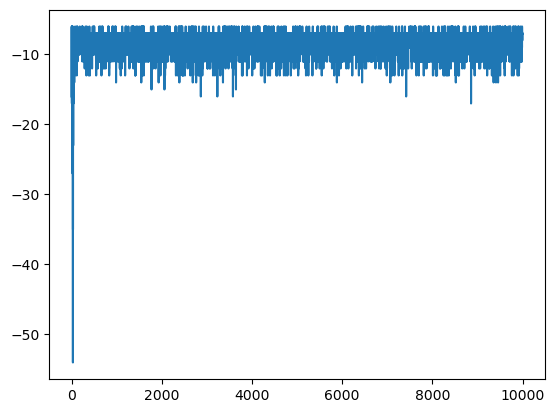

-----------------------------------------------
| -5.262 | -4.736 | -4.152 | -3.503 | -2.782 | 
-----------------------------------------------
| -5     | -4.152 | -3.503 | -5     | -1.98  | 
-----------------------------------------------
| -3.193 | -3.503 | -2.782 | -1.98  | -1.089 | 
-----------------------------------------------
| -2.873 | -5     | -1.98  | -1.089 | -0.099 | 
-----------------------------------------------
| -2.858 | -2.75  | -5     | -0.103 | 1      | 
-----------------------------------------------


In [15]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 28 12:59:23 2020
Assignment 2 - Agents and Reinforcement Learning
@author: Ronan Murphy - 15397831
"""


import numpy as np
import random
import matplotlib.pyplot as plt



#set the rows and columns length
BOARD_ROWS = 5
BOARD_COLS = 5

#initalise start, win and lose states
START = (0, 0)
WIN_STATE = (4, 4)
HOLE_STATE = [(1,0),(3,1),(4,2),(1,3)]

#class state defines the board and decides reward, end and next position
class State:
    def __init__(self, state=START):
        #initalise the state to start and end to false
        self.state = state
        self.isEnd = False        

    def getReward(self):
        #give the rewards for each state -5 for loss, +1 for win, -1 for others
        for i in HOLE_STATE:
            if self.state == i:
                return -5
        if self.state == WIN_STATE:
            return 1       
        
        else:
            return -1

    def isEndFunc(self):
        #set state to end if win/loss
        if (self.state == WIN_STATE):
            self.isEnd = True
            
        for i in HOLE_STATE:
            if self.state == i:
                self.isEnd = True

    def nxtPosition(self, action):     
        #set the positions from current action - up, down, left, right
        if action == 0:                
            nxtState = (self.state[0] - 1, self.state[1]) #up             
        elif action == 1:
            nxtState = (self.state[0] + 1, self.state[1]) #down
        elif action == 2:
            nxtState = (self.state[0], self.state[1] - 1) #left
        else:
            nxtState = (self.state[0], self.state[1] + 1) #right


        #check if next state is possible
        if (nxtState[0] >= 0) and (nxtState[0] <= 4):
            if (nxtState[1] >= 0) and (nxtState[1] <= 4):    
                    #if possible change to next state                
                    return nxtState 
        #Return current state if outside grid     
        return self.state 



        
#class agent to implement reinforcement learning through grid  
class Agent:

    def __init__(self):
        #inialise states and actions 
        self.states = []
        self.actions = [0,1,2,3]    # up, down, left, right
        self.State = State()
        #set the learning and greedy values
        self.alpha = 0.5
        self.gamma = 0.9
        self.epsilon = 0.1
        self.isEnd = self.State.isEnd

        # array to retain reward values for plot
        self.plot_reward = []
        
        #initalise Q values as a dictionary for current and new
        self.Q = {}
        self.new_Q = {}
        #initalise rewards to 0
        self.rewards = 0
        
        #initalise all Q values across the board to 0, print these values
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                for k in range(len(self.actions)):
                    self.Q[(i, j, k)] =0
                    self.new_Q[(i, j, k)] = 0
        
        print(self.Q)
        
    

    #method to choose action with Epsilon greedy policy, and move to next state
    def Action(self):
        #random value vs epsilon
        rnd = random.random()
        #set arbitraty low value to compare with Q values to find max
        mx_nxt_reward =-10
        action = None
        
        #9/10 find max Q value over actions 
        if(rnd >self.epsilon) :
            #iterate through actions, find Q  value and choose best 
            for k in self.actions:
                
                i,j = self.State.state
                
                nxt_reward = self.Q[(i,j, k)]
                
                if nxt_reward >= mx_nxt_reward:
                    action = k
                    mx_nxt_reward = nxt_reward
                    
        #else choose random action
        else:
            action = np.random.choice(self.actions)
        
        #select the next state based on action chosen
        position = self.State.nxtPosition(action)
        return position,action
    
    
    #Q-learning Algorithm
    def Q_Learning(self,episodes):
        x = 0
        #iterate through best path for each episode
        while(x < episodes):
            #check if state is end
            if self.isEnd:
                #get current rewrard and add to array for plot
                reward = self.State.getReward()
                self.rewards += reward
                self.plot_reward.append(self.rewards)
                
                #get state, assign reward to each Q_value in state
                i,j = self.State.state
                for a in self.actions:
                    self.new_Q[(i,j,a)] = round(reward,3)
                    
                #reset state
                self.State = State()
                self.isEnd = self.State.isEnd
                
                #set rewards to zero and iterate to next episode
                self.rewards = 0
                x+=1
            else:
                #set to arbitrary low value to compare net state actions
                mx_nxt_value = -10
                #get current state, next state, action and current reward
                next_state, action = self.Action()
                i,j = self.State.state
                reward = self.State.getReward()
                #add reward to rewards for plot
                self.rewards +=reward
                
                #iterate through actions to find max Q value for action based on next state action
                for a in self.actions:
                    nxtStateAction = (next_state[0], next_state[1], a)
                    q_value = (1-self.alpha)*self.Q[(i,j,action)] + self.alpha*(reward + self.gamma*self.Q[nxtStateAction])
                
                    #find largest Q value
                    if q_value >= mx_nxt_value:
                        mx_nxt_value = q_value
                
                #next state is now current state, check if end state
                self.State = State(state=next_state)
                self.State.isEndFunc()
                self.isEnd = self.State.isEnd
                
                #update Q values with max Q value for next state
                self.new_Q[(i,j,action)] = round(mx_nxt_value,3)
            
            #copy new Q values to Q table
            self.Q = self.new_Q.copy()
        #print final Q table output
        print(self.Q)
        
    #plot the reward vs episodes
    def plot(self,episodes):
        
        plt.plot(self.plot_reward)
        plt.show()
        
        
    #iterate through the board and find largest Q value in each, print output
    def showValues(self):
        for i in range(0, BOARD_ROWS):
            print('-----------------------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                mx_nxt_value = -10
                for a in self.actions:
                    nxt_value = self.Q[(i,j,a)]
                    if nxt_value >= mx_nxt_value:
                        mx_nxt_value = nxt_value
                out += str(mx_nxt_value).ljust(6) + ' | '
            print(out)
        print('-----------------------------------------------')
        
    
        
if __name__ == "__main__":
    #create agent for 10,000 episdoes implementing a Q-learning algorithm plot and show values.
    ag = Agent()
    episodes = 10000
    ag.Q_Learning(episodes)
    ag.plot(episodes)
    ag.showValues()